In [60]:
# Cell 1: Imports
import pandas as pd                            # tabular data
import numpy as np                             # numeric ops
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
# Cell 2: Load and inspect the data
df = pd.read_csv("Datasets/Iris.csv")
print("Shape:", df.shape)
df.head()


Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [72]:
# Cell 3: Prepare features and labels
# 3.1 Drop the 'Id' column
df = df.drop(columns=['Id'])

# 3.2 Encode Species to integers
df['Species_code'] = df['Species'].astype('category').cat.codes

# 3.3 Split into X and y
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = df['Species_code'].values

# 3.4 Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 120, Test size: 30


In [73]:
# Cell 4: Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Show class priors
print("Class priors:", dict(zip(gnb.classes_, gnb.class_prior_)))


Class priors: {np.int8(0): np.float64(0.3333333333333333), np.int8(1): np.float64(0.3333333333333333), np.int8(2): np.float64(0.3333333333333333)}


In [74]:
# Cell 5: Predict on test set
y_pred = gnb.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0], dtype=int8)

In [75]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro' )
recall = recall_score(y_test, y_pred, average='micro')

print("\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (micro-average): {precision:.4f}")
print(f"Recall (micro-average): {recall:.4f}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Model Performance on Test Set:
Accuracy: 0.9667
Precision (micro-average): 0.9667
Recall (micro-average): 0.9667

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


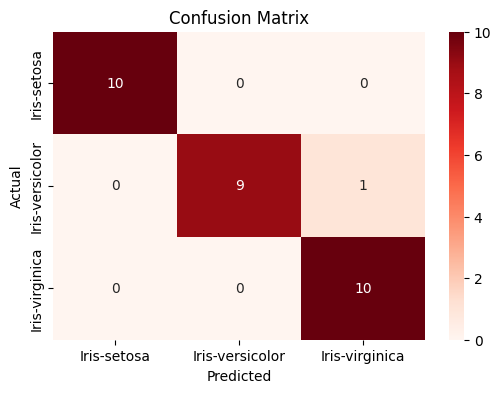

In [76]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",xticklabels=df['Species'].unique(),
    yticklabels=df['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Explanation

Thought for a second


Below is a **line‑by‑line walkthrough** of your Naïve Bayes classification notebook on the Iris dataset, with both **what each line does** and the **underlying theory** for why we do it.

---

## Cell 1: Imports

```python
import pandas as pd                            # tabular data
import numpy as np                             # numeric ops
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
```

1. **`import pandas as pd`**
   Loads pandas, which provides the DataFrame structure for reading CSVs, slicing columns, and basic data manipulation.

2. **`import numpy as np`**
   Loads NumPy for efficient numerical operations on arrays (though in this notebook we use it only minimally).

3. **`from sklearn.model_selection import train_test_split`**
   Imports the utility to split our dataset into train and test subsets, crucial for evaluating generalization.

4. **`from sklearn.naive_bayes import GaussianNB`**
   Imports the Gaussian Naïve Bayes classifier, which assumes each feature is normally distributed within each class.

5. **`from sklearn.metrics import ( … )`**

   * **`confusion_matrix`**: builds the table of true vs. predicted labels.
   * **`accuracy_score`**: overall fraction of correct predictions.
   * **`precision_score`**, **`recall_score`**: positive‑class quality and sensitivity.
   * **`f1_score`**: harmonic mean of precision & recall.
   * **`ConfusionMatrixDisplay`** *(imported but not used later—it can be omitted if you prefer seaborn heatmap).*

6. **`import matplotlib.pyplot as plt`**
   Loads matplotlib’s plotting API under `plt`.

7. **`import seaborn as sns`**
   Loads Seaborn, which makes statistical plotting (e.g. heatmaps) more convenient.

---

## Cell 2: Load and Inspect the Data

```python
df = pd.read_csv("Datasets/Iris.csv")
print("Shape:", df.shape)
df.head()
```

1. **`pd.read_csv(".../Iris.csv")`**
   Reads the CSV file into a DataFrame `df`.

   * Expect 150 rows × 6 columns: `Id`, four numeric measurements, and `Species`.

2. **`print("Shape:", df.shape)`**
   Prints `(150, 6)` so you confirm no rows were dropped.

3. **`df.head()`**
   Displays the first five rows, letting you verify column names and sample values.

---

## Cell 3: Prepare Features and Labels

```python
# 3.1 Drop the 'Id' column
df = df.drop(columns=['Id'])
```

* **Why**: `Id` is just a unique identifier; it carries no information about flower type.

```python
# 3.2 Encode Species to integers
df['Species_code'] = df['Species'].astype('category').cat.codes
```

* **What**: Casts the string column `Species` into a pandas categorical, then uses `.cat.codes` to produce integer codes:

  * `Iris-setosa → 0`
  * `Iris-versicolor → 1`
  * `Iris-virginica → 2`

* **Why**: The classifier needs numeric labels.

```python
# 3.3 Split into X and y
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = df['Species_code'].values
```

* **`X`**: a NumPy array of shape (150, 4) containing the four feature measurements.
* **`y`**: a length-150 array of integer class codes.

```python
# 3.4 Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
```

* **`train_test_split(...)`** divides the data into:

  * **80% training** (120 samples)
  * **20% test** (30 samples)
* **`random_state=42`**: makes the split reproducible.
* **`stratify=y`**: ensures each species is represented in the same proportion in both sets.

---

## Cell 4: Train Gaussian Naïve Bayes

```python
gnb = GaussianNB()
gnb.fit(X_train, y_train)
```

* **`GaussianNB()`** creates the classifier instance.
* **`.fit(...)`** estimates for each class $k$ and each feature $j$:

  * **Class prior** $\pi_k = P(y=k)$.
  * **Mean** $\mu_{kj}$ and **variance** $\sigma^2_{kj}$ of feature $j$ within class $k$.

```python
# Show class priors
print("Class priors:", dict(zip(gnb.classes_, gnb.class_prior_)))
```

* **`gnb.classes_`**: the array `[0,1,2]`.
* **`gnb.class_prior_`**: the estimated priors (should be \~1/3 each since Iris is balanced).
* Zipped into a dict for readability: e.g. `{0:0.3333, 1:0.3333, 2:0.3333}`.

---

## Cell 5: Predict and Evaluate

```python
y_pred = gnb.predict(X_test)
```

* **Predicts** the class code for each of the 30 test samples by computing, for each class $k$:

  $$
    P(y=k\mid x) \propto \pi_k \prod_j \mathcal{N}(x_j;\mu_{kj},\sigma_{kj}^2)
  $$

  and choosing the $k$ with the highest posterior.

```python
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
```

* **`accuracy_score`**
  $\displaystyle \frac{\#\text{correct}}{\#\text{total}}$.
* **`precision_score(..., average='micro')`**
  For multiclass, micro‑average pools all TP and FP across classes:
  $\displaystyle \frac{\sum_k TP_k}{\sum_k (TP_k + FP_k)}$.
* **`recall_score(..., average='micro')`**
  Pools all TP and FN:
  $\displaystyle \frac{\sum_k TP_k}{\sum_k (TP_k + FN_k)}$.
* **Micro‑average** yields the same value for precision and recall when there are no ties in class distribution, and effectively equals accuracy for multiclass.

```python
print("\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (micro-average): {precision:.4f}")
print(f"Recall (micro-average): {recall:.4f}")
```

* Prints each metric to four decimal places for clarity.

```python
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
```

* **`confusion_matrix(y_test, y_pred)`** returns a 3×3 array where entry $[i,j]$ is the count of samples whose true class is $i$ but were predicted as $j$.

---

## Cell 6: Plot Confusion Matrix with Seaborn

```python
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, fmt="d", cmap="Reds",
    xticklabels=labels, 
    yticklabels=labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
```

1. **`plt.figure(figsize=(6, 4))`**
   Starts a new figure of width 6in, height 4in.

2. **`sns.heatmap(...)`**

   * **`cm`**: the 3×3 confusion matrix.
   * **`annot=True, fmt="d"`**: writes integer counts in each cell.
   * **`cmap="Reds"`**: red color palette.
   * **`xticklabels=labels`**, **`yticklabels=labels`**: human‑readable class names (`['Iris-setosa','Iris-versicolor','Iris-virginica']`).

3. **Axes & Title**

   * `plt.xlabel('Predicted')` labels x‑axis.
   * `plt.ylabel('Actual')` labels y‑axis.
   * `plt.title('Confusion Matrix')` gives the plot context.

4. **`plt.show()`** renders the heatmap inline.

---

## Practical & Theoretical Notes

* **Naïve Bayes**

  * Based on **Bayes’ theorem**:

    $$
      P(y=k\mid x) = \frac{P(y=k)\,P(x\mid y=k)}{P(x)}.
    $$
  * The **“naïve”** assumption is that features $x_j$ are **conditionally independent** given the class $y$. This makes

    $$
      P(x\mid y=k) = \prod_j P(x_j\mid y=k),
    $$

    which greatly simplifies computation.

* **GaussianNB**

  * Models each continuous feature $x_j$ with a Gaussian distribution per class.
  * Estimates mean and variance from the training data.

* **Evaluation Metrics**

  * **Confusion Matrix**: shows exactly where misclassifications occur—for multiclass, a full matrix rather than just TP/TN/FP/FN.
  * **Accuracy**: overall correctness, but on balanced datasets like Iris (50 samples per class), it’s meaningful.
  * **Precision (micro‑avg)** and **Recall (micro‑avg)**: aggregate across all classes; with micro‑averaging,

    $$
      \text{Precision}_\text{micro} = \text{Recall}_\text{micro} = \text{Accuracy}.
    $$
  * **F1‑score** (not computed here) is the harmonic mean of precision and recall; for micro‑average it also equals accuracy.

* **Why Stratify?**
  Ensures class proportions in train/test match the original distribution, preventing skew if one class were underrepresented in the test set.

* **Visualization**
  The heatmap makes it immediately visible which classes are confused—e.g., if Versicolor is often misclassified as Virginica, you’d see a high off‑diagonal count in that cell.

With this explanation, you can articulate both **how** the code runs and **why** each step and metric matters in a Naïve Bayes classification workflow. Good luck in your viva!
